In [1]:
# 基础设置：导入库与读取CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 results 下的三个结果文件
path_base = "results"
df_ecnu = pd.read_csv(f"{path_base}/esi_data_ecnu_rankings.csv")            # ECNU 各学科排名
df_mainland = pd.read_csv(f"{path_base}/esi_data_mainland_rankings.csv")    # 中国大陆各高校表现
df_region = pd.read_csv(f"{path_base}/esi_data_region_rankings.csv")        # 全球各区域表现（汇总）

# 简要预览
display(df_ecnu.head(), df_mainland.head(), df_region.head())

,filter_value,subject_rank
0,AGRICULTURAL SCIENCES,845
1,BIOLOGY & BIOCHEMISTRY,721
2,CHEMISTRY,90
3,CLINICAL MEDICINE,2852
4,COMPUTER SCIENCE,207


,filter_value,institution,subject_rank,web_of_science_documents,cites,cites_per_paper,top_papers
0,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF SCIENCES,1,15661,332254,21.22,251
1,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF AGRICULTURAL SCIENCES,2,12222,223855,18.32,198
2,AGRICULTURAL SCIENCES,CHINA AGRICULTURAL UNIVERSITY,4,10052,207779,20.67,166
3,AGRICULTURAL SCIENCES,JIANGNAN UNIVERSITY,6,8027,181325,22.59,166
4,AGRICULTURAL SCIENCES,NORTHWEST A&F UNIVERSITY - CHINA,7,9024,180634,20.02,162


,filter_value,country_region,total_top_papers
0,AGRICULTURAL SCIENCES,CHINA MAINLAND,4615
1,AGRICULTURAL SCIENCES,USA,2669
2,AGRICULTURAL SCIENCES,FRANCE,788
3,AGRICULTURAL SCIENCES,SPAIN,663
4,AGRICULTURAL SCIENCES,ITALY,607


### 任务5：获取华东师范大学在各个学科中的排名（放在第2个代码单元）

,filter_value,subject_rank
0,CHEMISTRY,90
1,MATHEMATICS,115
2,ENVIRONMENT ECOLOGY,130
3,MATERIALS SCIENCE,196
4,COMPUTER SCIENCE,207
5,GEOSCIENCES,275
6,"SOCIAL SCIENCES, GENERAL",314
7,ENGINEERING,317
8,PLANT & ANIMAL SCIENCE,395
9,PSYCHIATRY PSYCHOLOGY,467


,filter_value,subject_rank
0,CHEMISTRY,90
1,MATHEMATICS,115
2,ENVIRONMENT ECOLOGY,130
3,MATERIALS SCIENCE,196
4,COMPUTER SCIENCE,207
5,GEOSCIENCES,275
6,"SOCIAL SCIENCES, GENERAL",314
7,ENGINEERING,317
8,PLANT & ANIMAL SCIENCE,395
9,PSYCHIATRY PSYCHOLOGY,467


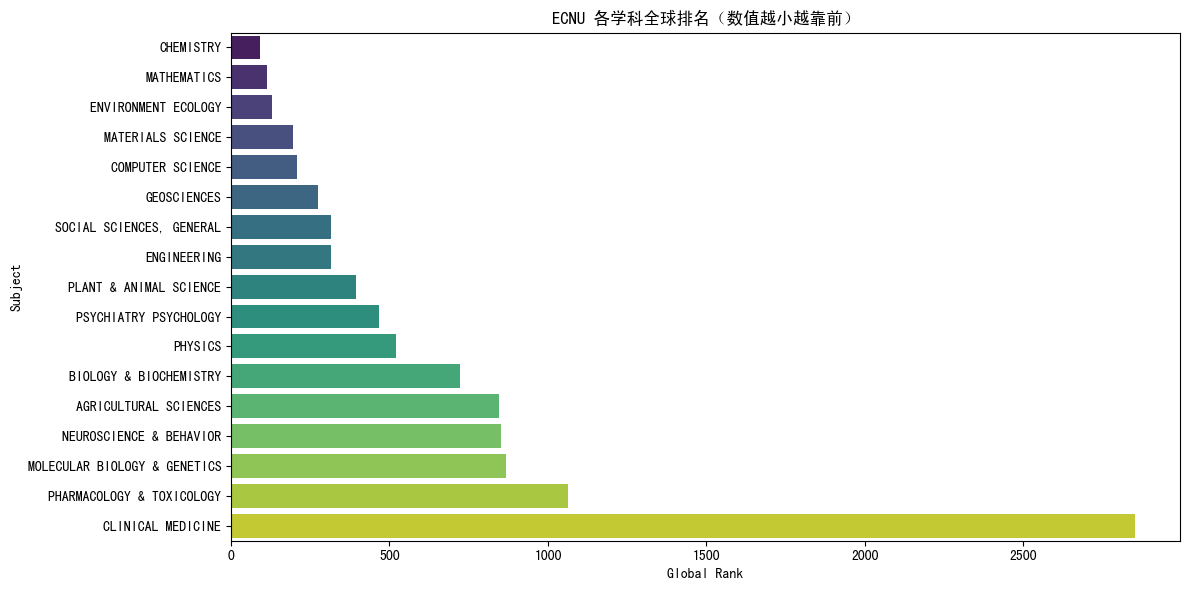

ECNU 最强学科（Top排名最靠前）：


,filter_value,subject_rank
0,CHEMISTRY,90
1,MATHEMATICS,115
2,ENVIRONMENT ECOLOGY,130
3,MATERIALS SCIENCE,196
4,COMPUTER SCIENCE,207


ECNU 最弱学科（排名最靠后）：


,filter_value,subject_rank
12,AGRICULTURAL SCIENCES,845
13,NEUROSCIENCE & BEHAVIOR,853
14,MOLECULAR BIOLOGY & GENETICS,867
15,PHARMACOLOGY & TOXICOLOGY,1064
16,CLINICAL MEDICINE,2852


In [2]:
# ECNU 各学科排名分析与可视化
ecnu_sorted = df_ecnu.sort_values("subject_rank", ascending=True).reset_index(drop=True)
display(ecnu_sorted)

# Top-N 学科（排名越小越好）
top_n = 10
display(ecnu_sorted.head(top_n))

# 可视化：条形图（按排名从好到差；y轴显示学科）
plt.figure(figsize=(12, 6))
plot_df = ecnu_sorted.copy()
plot_df["label"] = plot_df["filter_value"].str.slice(0, 28)  # 过长截断，避免标签拥挤
sns.barplot(
    data=plot_df,
    y="label",
    x="subject_rank",
    order=plot_df.sort_values("subject_rank")["label"],
    hue="label",
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("ECNU 各学科全球排名（数值越小越靠前）")
plt.xlabel("Global Rank")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()

# 额外：显示最强/最弱的若干学科
best_k = 5
worst_k = 5
print("ECNU 最强学科（Top排名最靠前）：")
display(ecnu_sorted.head(best_k))
print("ECNU 最弱学科（排名最靠后）：")
display(ecnu_sorted.tail(worst_k))

#### 任务6：获取中国（大陆）大学在各个学科中的表现（放在第3个代码单元）

,filter_value,institution,subject_rank,web_of_science_documents,cites,cites_per_paper,top_papers
0,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF SCIENCES,1,15661,332254,21.22,251
1,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF AGRICULTURAL SCIENCES,2,12222,223855,18.32,198
2,AGRICULTURAL SCIENCES,CHINA AGRICULTURAL UNIVERSITY,4,10052,207779,20.67,166
3,AGRICULTURAL SCIENCES,JIANGNAN UNIVERSITY,6,8027,181325,22.59,166
4,AGRICULTURAL SCIENCES,NORTHWEST A&F UNIVERSITY - CHINA,7,9024,180634,20.02,162
5,AGRICULTURAL SCIENCES,NANJING AGRICULTURAL UNIVERSITY,10,6480,137921,21.28,99
6,AGRICULTURAL SCIENCES,"UNIVERSITY OF CHINESE ACADEMY OF SCIENCES, CAS",12,5950,127682,21.46,95
7,AGRICULTURAL SCIENCES,ZHEJIANG UNIVERSITY,13,5313,125715,23.66,148
8,AGRICULTURAL SCIENCES,SOUTH CHINA UNIVERSITY OF TECHNOLOGY,16,3524,108282,30.73,117
9,AGRICULTURAL SCIENCES,HUAZHONG AGRICULTURAL UNIVERSITY,18,4855,97482,20.08,68


,filter_value,institution,subject_rank,web_of_science_documents,cites,cites_per_paper,top_papers
0,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF SCIENCES,1,15661,332254,21.22,251
1,AGRICULTURAL SCIENCES,CHINESE ACADEMY OF AGRICULTURAL SCIENCES,2,12222,223855,18.32,198
10,AGRICULTURAL SCIENCES,JIANGSU UNIVERSITY,20,4084,89040,21.80,176
2,AGRICULTURAL SCIENCES,CHINA AGRICULTURAL UNIVERSITY,4,10052,207779,20.67,166
3,AGRICULTURAL SCIENCES,JIANGNAN UNIVERSITY,6,8027,181325,22.59,166
4,AGRICULTURAL SCIENCES,NORTHWEST A&F UNIVERSITY - CHINA,7,9024,180634,20.02,162
7,AGRICULTURAL SCIENCES,ZHEJIANG UNIVERSITY,13,5313,125715,23.66,148
8,AGRICULTURAL SCIENCES,SOUTH CHINA UNIVERSITY OF TECHNOLOGY,16,3524,108282,30.73,117
11,AGRICULTURAL SCIENCES,NORTHEAST AGRICULTURAL UNIVERSITY - CHINA,27,3889,72600,18.67,101
5,AGRICULTURAL SCIENCES,NANJING AGRICULTURAL UNIVERSITY,10,6480,137921,21.28,99


,within_top_200,within_top_500
filter_value,,
MATERIALS SCIENCE,78,158
ENGINEERING,69,130
CHEMISTRY,65,134
COMPUTER SCIENCE,64,120
MATHEMATICS,47,86
AGRICULTURAL SCIENCES,46,103
PHARMACOLOGY & TOXICOLOGY,45,74
GEOSCIENCES,38,76
ENVIRONMENT ECOLOGY,32,82


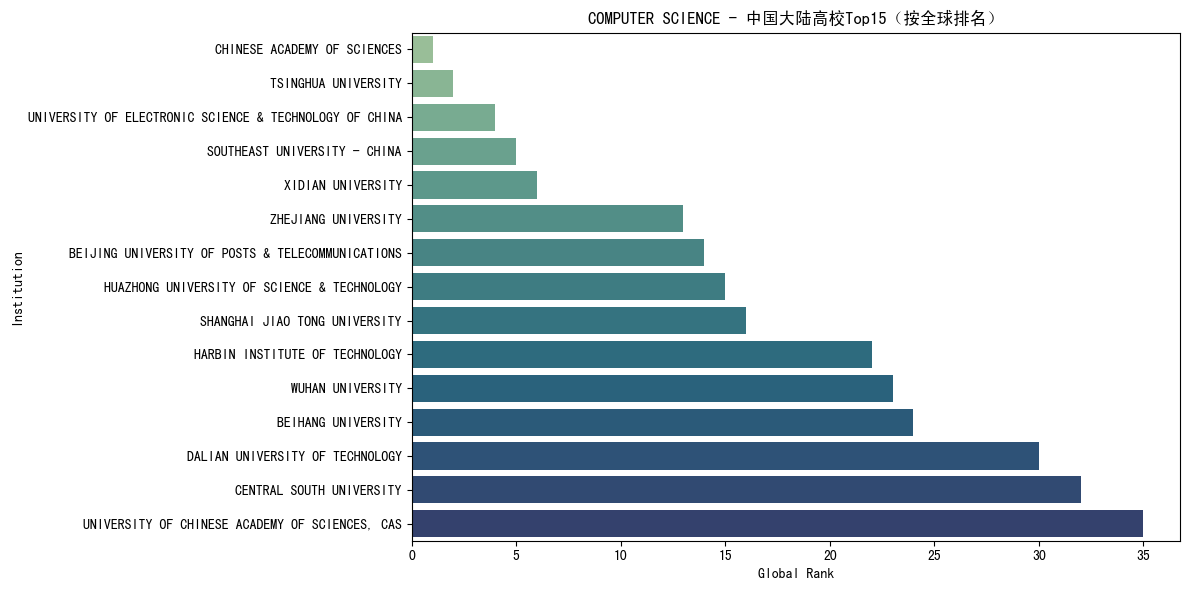

In [3]:
# 如果该CSV已经仅包含中国大陆，则无需再过滤；若想稳妥可保留这行：
df_mainland_only = df_mainland[df_mainland["institution"].notna()].copy()

# 工具函数1：查看某学科 Top N 高校（按排名或Top Papers）
def top_institutions_by_subject(subject, n=10, sort_by="subject_rank", ascending=True):
    """
    subject: 学科名（如 'AGRICULTURAL SCIENCES'）
    sort_by: 'subject_rank'（看全球排名）或 'top_papers'（高被引论文数）
    ascending: True 表示从小到大（排名/数值小靠前），对 top_papers 一般用 False
    """
    sdf = df_mainland_only[df_mainland_only["filter_value"] == subject].copy()
    if sdf.empty:
        print(f"该学科暂无数据: {subject}")
        return sdf
    sdf = sdf.sort_values(sort_by, ascending=ascending)
    return sdf.head(n)

# 示例：查看“AGRICULTURAL SCIENCES”按全球排名最靠前的前10所大陆高校
display(top_institutions_by_subject("AGRICULTURAL SCIENCES", n=10, sort_by="subject_rank", ascending=True))

# 示例：同一学科按 top_papers（高被引论文数）排序的前10所
display(top_institutions_by_subject("AGRICULTURAL SCIENCES", n=10, sort_by="top_papers", ascending=False))

# 工具函数2：统计每个学科“进入某排名阈值（如Top 100/200/500）”的大陆高校数量
def count_within_rank_thresholds(thresholds=(100, 200, 500)):
    res = {}
    for t in thresholds:
        c = (df_mainland_only["subject_rank"] <= t).groupby(df_mainland_only["filter_value"]).sum()
        res[t] = c.rename(f"within_top_{t}")
    out = pd.concat(res.values(), axis=1).fillna(0).astype(int)
    return out.sort_values(out.columns.tolist(), ascending=[False]*len(out.columns))

# 统计各学科进入Top200/Top500的高校数
subject_rank_stats = count_within_rank_thresholds((200, 500))
display(subject_rank_stats.head(20))

# 可视化：某个学科的前N所高校排名（柱形图）
def plot_subject_top_n(subject, n=15):
    sdf = df_mainland_only[df_mainland_only["filter_value"] == subject].copy()
    sdf = sdf.sort_values("subject_rank", ascending=True).head(n)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sdf, x="subject_rank", y="institution", hue="institution", dodge=False, legend=False, palette="crest")
    plt.title(f"{subject} - 中国大陆高校Top{n}（按全球排名）")
    plt.xlabel("Global Rank")
    plt.ylabel("Institution")
    plt.tight_layout()
    plt.show()

# 示例：绘制“COMPUTER SCIENCE”学科前15所大陆高校
plot_subject_top_n("COMPUTER SCIENCE", n=15)

#### 任务7：分析全球不同区域在各个学科中的表现（放在第4个代码单元）

,filter_value,country_region,total_top_papers
0,AGRICULTURAL SCIENCES,CHINA MAINLAND,4615
1,AGRICULTURAL SCIENCES,USA,2669
2,AGRICULTURAL SCIENCES,FRANCE,788
3,AGRICULTURAL SCIENCES,SPAIN,663
4,AGRICULTURAL SCIENCES,ITALY,607
5,AGRICULTURAL SCIENCES,AUSTRALIA,492
6,AGRICULTURAL SCIENCES,GERMANY (FED REP GER),457
7,AGRICULTURAL SCIENCES,UNKNOWN,430
8,AGRICULTURAL SCIENCES,ENGLAND,423
9,AGRICULTURAL SCIENCES,INDIA,412


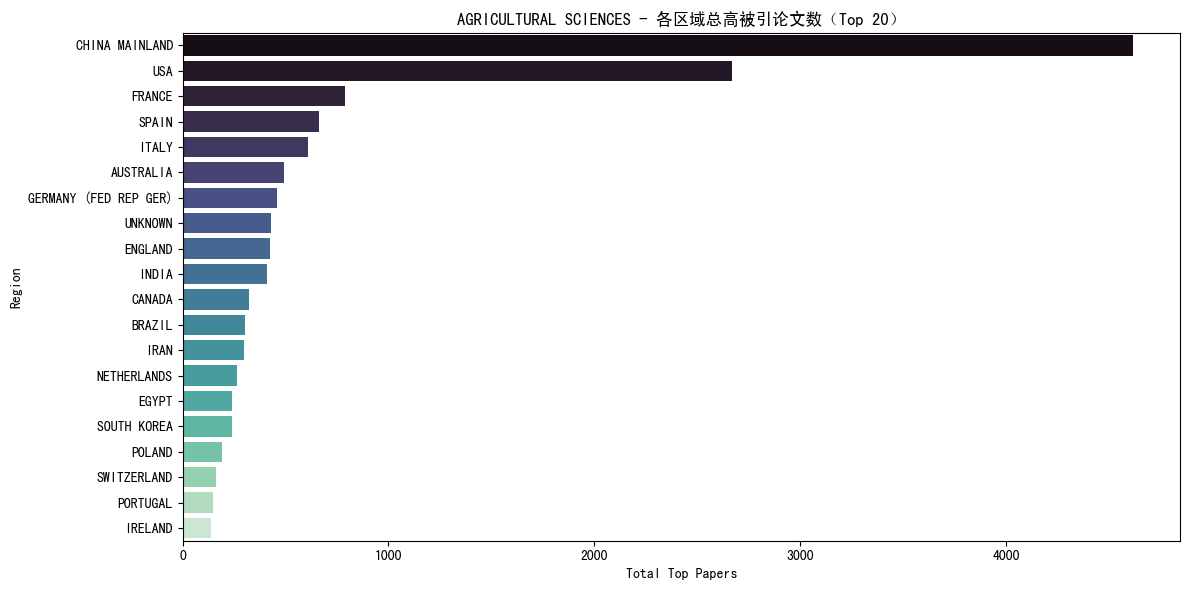

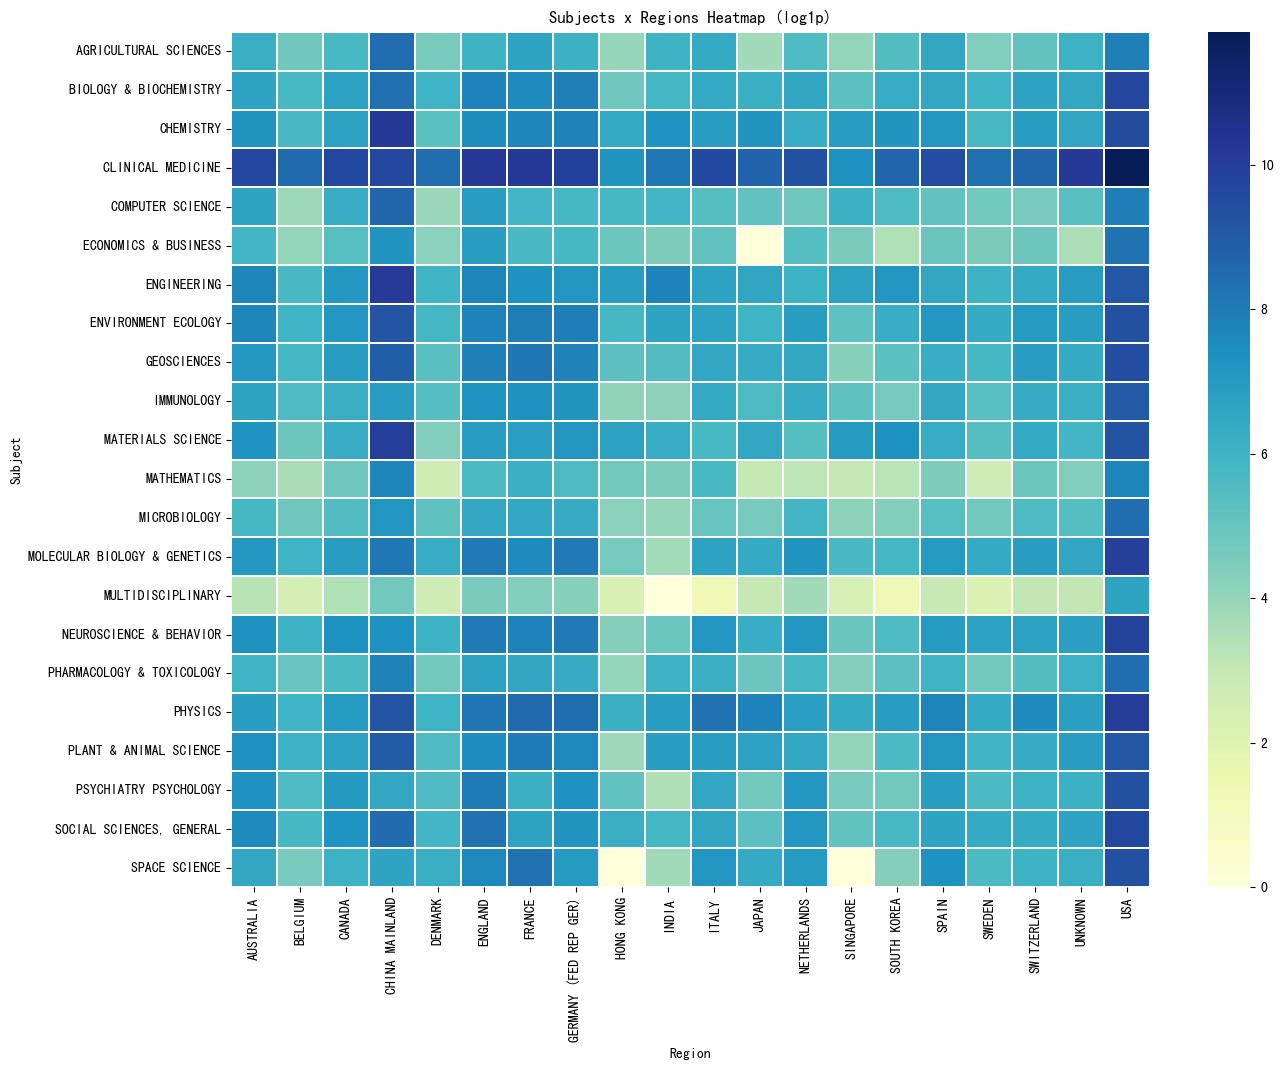

In [4]:
# 预处理：将空的国家/地区填充为 'UNKNOWN'
df_region_clean = df_region.copy()
df_region_clean["country_region"] = df_region_clean["country_region"].fillna("").replace("", "UNKNOWN")

# 工具函数1：查看某学科各区域总的 top_papers 排名（并可视化）
def region_performance_by_subject(subject, top_n=20):
    sdf = df_region_clean[df_region_clean["filter_value"] == subject].copy()
    if sdf.empty:
        print(f"该学科暂无数据: {subject}")
        return sdf
    sdf = sdf.sort_values("total_top_papers", ascending=False).head(top_n)
    display(sdf)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sdf, x="total_top_papers", y="country_region", hue="country_region", dodge=False, legend=False, palette="mako")
    plt.title(f"{subject} - 各区域总高被引论文数（Top {top_n}）")
    plt.xlabel("Total Top Papers")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()
    return sdf

# 示例：农业科学学科的全球区域表现
_ = region_performance_by_subject("AGRICULTURAL SCIENCES", top_n=20)

# 工具函数2：学科 x 区域 的热力图（便于宏观比较）
def plot_subject_region_heatmap(subjects=None, top_regions=20, log_scale=True):
    dfp = df_region_clean.copy()
    # 选取总量最高的若干区域（全学科合计）
    top_regions_list = (
        dfp.groupby("country_region")["total_top_papers"]
        .sum()
        .sort_values(ascending=False)
        .head(top_regions)
        .index.tolist()
    )
    dfp = dfp[dfp["country_region"].isin(top_regions_list)]
    if subjects is not None:
        dfp = dfp[dfp["filter_value"].isin(subjects)]
    pt = dfp.pivot_table(index="filter_value", columns="country_region", values="total_top_papers", aggfunc="sum", fill_value=0)
    data = pt.copy()
    if log_scale:
        data = np.log1p(data)  # 对数缩放，缓解极值影响
    plt.figure(figsize=(min(18, 2 + data.shape[1] * 0.6), min(12, 2 + data.shape[0] * 0.4)))
    sns.heatmap(data, cmap="YlGnBu", linewidths=0.2, linecolor="white")
    title = "Subjects x Regions Heatmap" + (" (log1p)" if log_scale else "")
    plt.title(title)
    plt.xlabel("Region")
    plt.ylabel("Subject")
    plt.tight_layout()
    plt.show()
    return pt

# 示例：绘制前20大区域×所有学科的热力图（log缩放）
_ = plot_subject_region_heatmap(top_regions=20, log_scale=True)